# 1. Linear Regression

### Dataset Used: [Sales Advertising Dataset](https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset/data)

In [22]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

## 1.1. Load Dataset

In [2]:
advertising_df = pd.read_csv("Advertising Budget and Sales.csv")
advertising_df.head()

Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9

## 1.2. Data Exploration 

In [3]:
# Drop unwanted column
advertising_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
advertising_df.shape

(200, 4)

In [5]:
advertising_df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [7]:
advertising_df.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

In [9]:
# Rename columns
advertising_df.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales'
}, inplace=True)

In [10]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Check null values
advertising_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
advertising_df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [15]:
# Correlation
advertising_df.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

## 1.3. Data Visualization

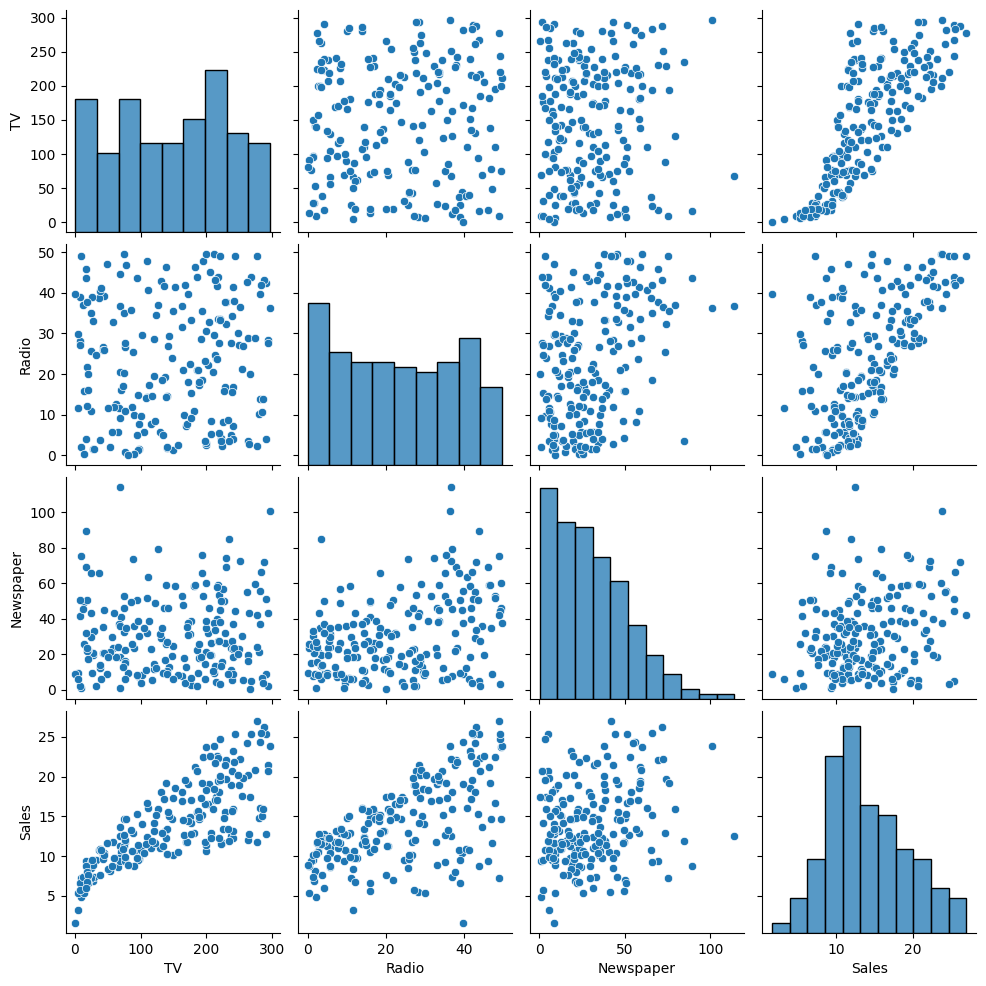

In [16]:
sns.pairplot(advertising_df)

<Axes: >

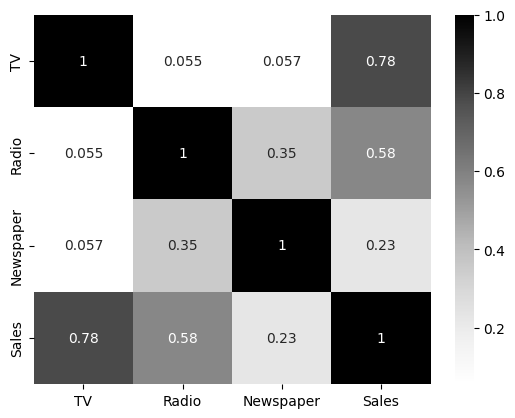

In [17]:
#heatmap
sns.heatmap(advertising_df.corr(), annot = True, cmap = 'Greys')

<Axes: >

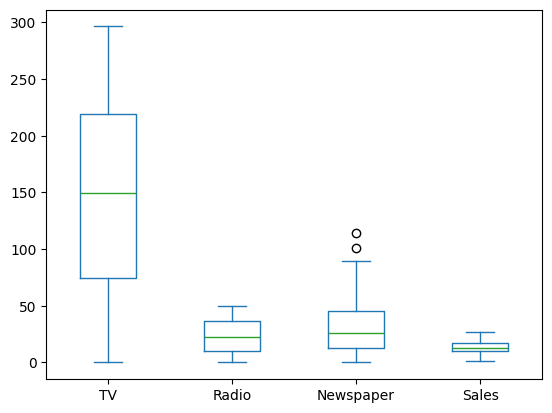

In [18]:
# Checking for outliers
advertising_df.plot(kind = 'box')

## 1.4. Data Preprocessing

In [20]:
# Separating independent and dependent variables
x = advertising_df[['TV', 'Radio', 'Newspaper']]
y = advertising_df['Sales']

In [21]:
x.shape, y.shape

((200, 3), (200,))

In [24]:
# Normalization
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.19208657, 0.66129032, 0.20404573],
       [0.4041258 , 0.39516129, 0.09938434],
       [0.02671627, 0.04233871, 0.00615655],
       [0.67331755, 0.05241935, 0.18381706],
       [0.2211701 , 0.11693548, 0.21020229],
       [0.72370646, 0.48387097, 0.03254178],
       [0.07811972, 0.70766129, 0.5769569 ],
       [0.32735881, 0.15322581, 0.06068602],
       [0.68785932, 0.66330645, 0.40193492],
       [0.65843761, 0.96169355, 0.46262093],
       [0.22691917, 0.73790323, 1.        ],
       [0.94927291, 0.7983871 , 0.48812665],
       [0.2316537 , 0.41330645, 0.15831135],
       [0.49577274, 0.48185484, 0.16534741],
       [0.73621914, 0.55846774, 0.46701847],
       [0.80047345, 0.10282258, 0.20404573],
       [0.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [27]:
X_train

array([[0.38992222, 0.15524194, 0.2005277 ],
       [0.59621238, 0.1875    , 0.05364996],
       [0.14338857, 0.53830645, 0.3060686 ],
       [0.20831924, 0.25403226, 0.15831135],
       [0.75515725, 0.0483871 , 0.13456464],
       [0.12681772, 0.07459677, 0.11873351],
       [0.23638823, 0.32258065, 0.35620053],
       [0.49577274, 0.48185484, 0.16534741],
       [0.35136963, 0.11491935, 0.29991205],
       [0.25566452, 0.55443548, 0.13808267],
       [0.26208996, 0.94354839, 0.30079156],
       [0.56712885, 0.14314516, 0.10993843],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.02401082, 0.78427419, 0.44239226],
       [0.25600271, 0.01612903, 0.12752858],
       [0.43523842, 0.11491935, 0.27264732],
       [0.24585729, 0.34274194, 0.11081794],
       [0.9773419 , 0.85282258, 0.44766931],
       [0.06391613, 0.40524194, 0.14687775],
       [0.66587758, 0.07056452, 0.04925242],
       [0.95908015, 0.21370968, 0.05364996],
       [0.62292864, 0.4233871 , 0.19085312],
       [0.

## 1.5. Model Training

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [29]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

## 1.6. Model Evaluation 

In [30]:
# Evaluate the model
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.7051294230814142
Testing MSE: 3.1740973539761064
Training R2 Score: 0.8957008271017817
Testing R2 Score: 0.8994380241009119


# 2. Logisitic Regression 